How Many Items Do People Checkout At Once?
      mean  std  min  50%  75%  90%  99%  max
Year                                         
2016     2    2    1    1    3    4   11   15
2017     2    2    1    2    3    5   11   21
2018     2    2    1    1    3    4   11   26
2019     2    2    1    2    3    4   11   20
2020     2    2    1    2    3    5   10   20
2021     2    2    1    2    3    5   12   28
2022     2    2    1    2    3    5   13   27
2023     2    2    1    1    2    4   13   22
2024     2    2    1    2    4    5   13   22


/tmp/ipykernel_14228/356403203.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(checkouts_with_complete_years.groupby('Year')['Item Count'].describe(percentiles=[.5, .75, .9, .99]).drop(columns=['count']).applymap(int))


<Axes: title={'center': 'How Many Items Do People Checkout At Once?'}, ylabel='Items Per Checkout'>

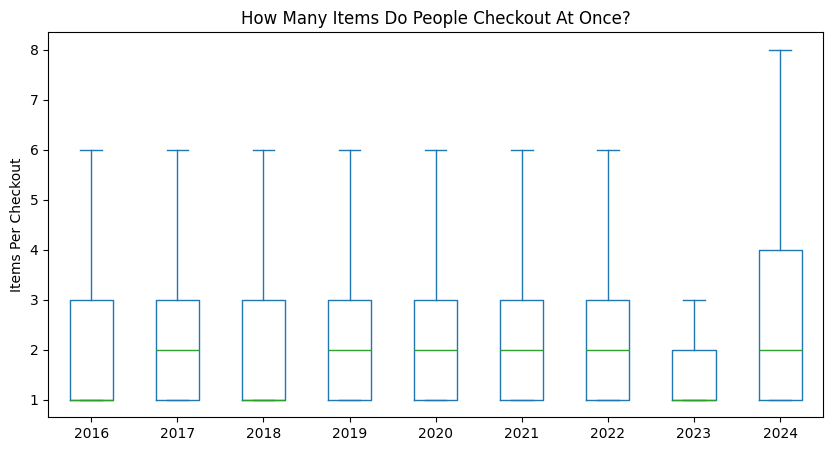

In [17]:
# How many items do people checkout at once, typically?
#
# And, while we're here, how many checkouts did we see per year?
import pandas as pd

checkouts = pd.read_pickle('data/output/checkouts.pkl')
checkouts['Year'] = checkouts['Checked Out'].map(lambda c: c.year)
# Exclude 2015 (tool library not fully open) and current year if it is only a month or two in.
checkouts_with_complete_years = checkouts[~checkouts['Year'].isin([2015])]

print('How Many Items Do People Checkout At Once?')
print(checkouts_with_complete_years.groupby('Year')['Item Count'].describe(percentiles=[.5, .75, .9, .99]).drop(columns=['count']).applymap(int))

# Try to visualize the descriptions above, to show the distribution by day

checkouts_with_complete_years.pivot(columns='Year', values='Item Count').plot.box(
    # "fliers" in plt parlance are outliers.  We don't show them here because
    # they are grouped together in a misleading/difficult to read way.
    showfliers=False,
    figsize=(10, 5),
    title='How Many Items Do People Checkout At Once?',
    ylabel='Items Per Checkout',
)

(<Axes: title={'center': 'How Many Checkouts Occur Each Year?'}, xlabel='Year', ylabel='Checkouts'>,)

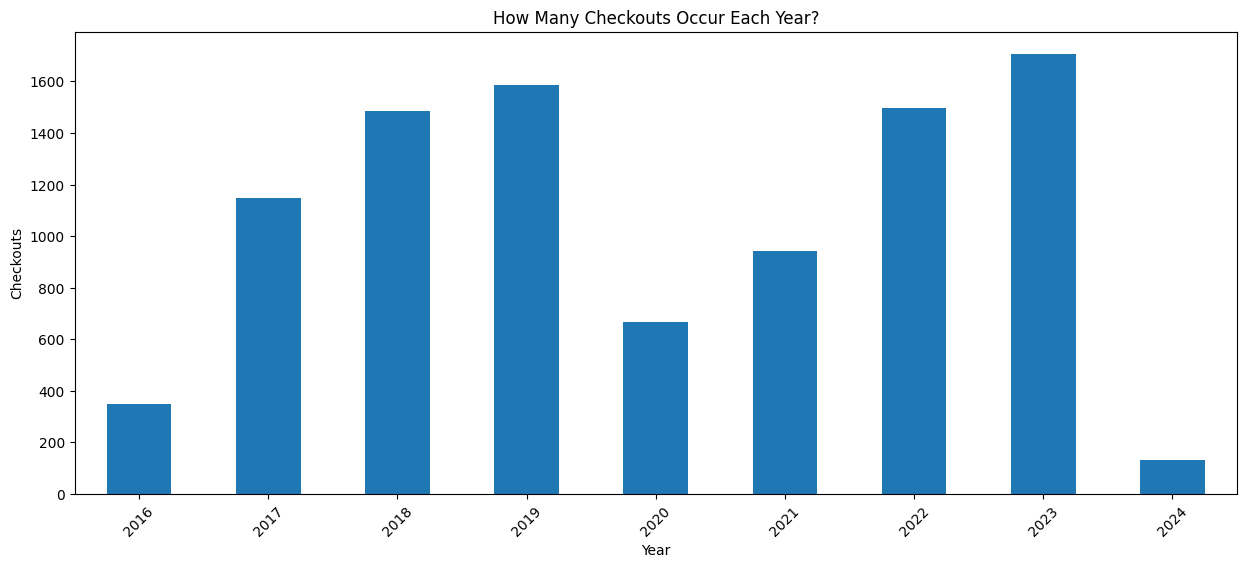

In [18]:
checkouts_with_complete_years.groupby('Year').size(
).plot(kind='bar', ylabel='Checkouts', rot=45, figsize=(15, 6), title='How Many Checkouts Occur Each Year?'),

In [19]:
from datetime import date
import pandas as pd

checkouts = pd.read_pickle('data/output/checkouts.pkl')
checkouts['Month'] = pd.to_datetime(checkouts['Checked Out'].map(lambda c: date(c.year, c.month, 1)))
checkouts['Year'] = checkouts['Checked Out'].map(lambda c: c.year)
# Exclude 2015 (tool library not fully open) and current year if it is only a month or two in.
checkouts_with_complete_years = checkouts[~checkouts['Year'].isin([2015])]

checkouts_by_month = checkouts_with_complete_years.groupby('Month').size().asfreq('MS', fill_value=0)

print('How Many Checkouts Occur In A Typical Month?')
checkouts_by_month.describe(percentiles=[.25, .5, .75, .9]).apply(int).drop(index='count')

How Many Checkouts Occur In A Typical Month?


mean     98
std      47
min       0
25%      68
50%     106
75%     131
90%     155
max     188
dtype: int64

In [20]:
from datetime import date
import pandas as pd

loans = pd.read_pickle('data/output/loans.pkl')
loans['Month'] = pd.to_datetime(loans['Checked Out'].map(lambda c: date(c.year, c.month, 1)))
loans['Year'] = loans['Checked Out'].map(lambda c: date(c.year, c.month, 1))

loans_with_complete_years = loans[~loans['Year'].isin([2015, 2022])]
loans_by_month = loans_with_complete_years.groupby('Month').size().asfreq('MS', fill_value=0)

print('How Many Items Are Loaned In A Typical Month?')
loans_by_month.describe(percentiles=[.25, .5, .75, .9]).apply(int).drop(index='count')

How Many Items Are Loaned In A Typical Month?


mean    213
std     118
min       0
25%     130
50%     227
75%     302
90%     348
max     458
dtype: int64

<Axes: title={'center': 'Are Checkouts And Items Loaned Per Month Very Different?'}, xlabel='Month', ylabel='Count'>

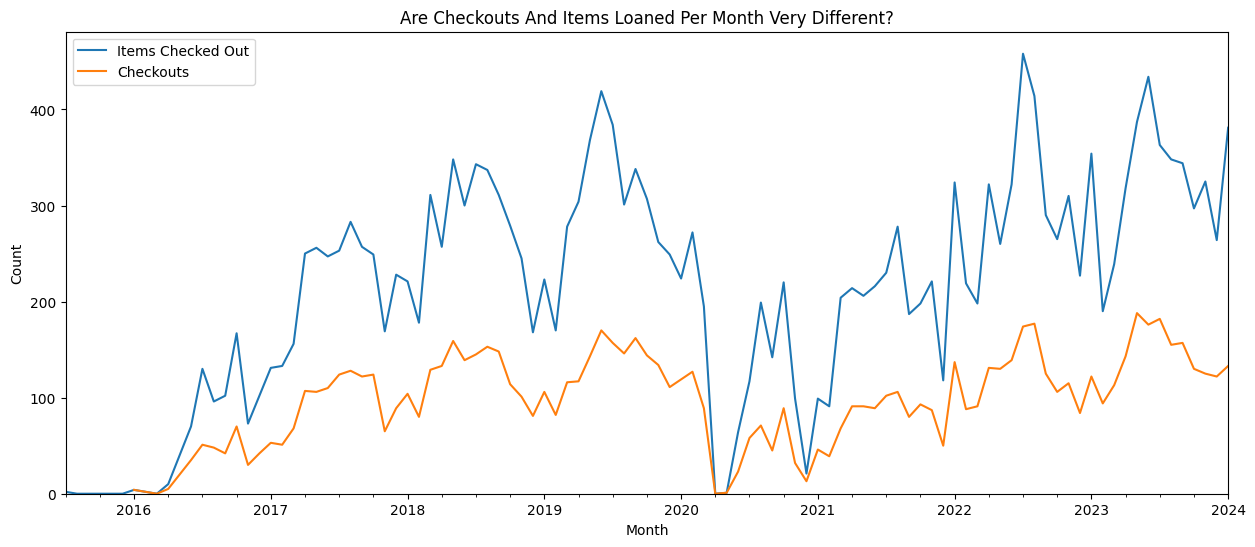

In [21]:
# Graph the number of items checked out, and check out events, for each month

# Make a new df with a column for each
loans_and_checkouts_by_month = pd.DataFrame({
    'Items Checked Out': loans_by_month,
    'Checkouts': checkouts_by_month,
})
loans_and_checkouts_by_month.plot(figsize=(15, 6), title='Are Checkouts And Items Loaned Per Month Very Different?', ylabel='Count', ylim=0)

In [22]:
# Look at the distribution of the length of loans over time.
from datetime import date
import pandas as pd

loans = pd.read_pickle('data/output/loans.pkl')
loans['Length'] = loans['Checked In'].fillna(pd.to_datetime(date.today())) - loans['Checked Out']
loans['Year'] = loans['Checked Out'].map(lambda c: c.year)
# Exclude 2015 (tool library not fully opened yet) and the current year if we're not that far in yet
loans_with_complete_years = loans[~loans['Year'].isin([2015])]

print('How Many Days Is An Item Typically Loaned For?')
loans_with_complete_years.groupby('Year').describe(
    include='timedelta', percentiles=[.25, .5, .75, .95, .99]
# Drop the 'count' column here, we have it elsewhere. Round each ovservation to the nearest day.
)['Length'].drop(columns='count').applymap(lambda t: t.round(freq='D'))

How Many Days Is An Item Typically Loaned For?


/tmp/ipykernel_14228/1126325180.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  )['Length'].drop(columns='count').applymap(lambda t: t.round(freq='D'))


,mean,std,min,25%,50%,75%,95%,99%,max
Year,,,,,,,,,
2016,29 days,100 days,0 days,6 days,7 days,21 days,70 days,858 days,898 days
2017,33 days,91 days,0 days,7 days,11 days,22 days,87 days,551 days,709 days
2018,24 days,52 days,0 days,7 days,10 days,21 days,87 days,277 days,903 days
2019,45 days,181 days,0 days,7 days,12 days,23 days,91 days,1535 days,1802 days
2020,127 days,299 days,0 days,7 days,21 days,77 days,1175 days,1428 days,1451 days
2021,65 days,195 days,0 days,7 days,14 days,28 days,261 days,1017 days,1105 days
2022,86 days,175 days,0 days,7 days,14 days,36 days,555 days,715 days,753 days
2023,55 days,93 days,0 days,7 days,14 days,42 days,298 days,384 days,387 days
2024,8 days,6 days,0 days,3 days,8 days,12 days,18 days,22 days,23 days


<Axes: title={'center': 'How Many Days Is An Item Typically Loaned For?'}, ylabel='Days Loaned'>

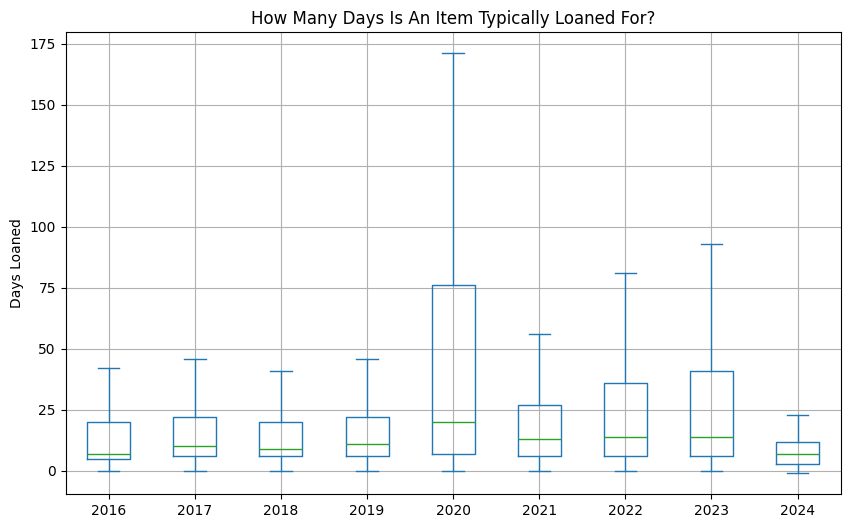

In [23]:
# Try to visualize the descriptions above, to show the distribution by day
loan_days_by_year = pd.DataFrame({'Days': loans_with_complete_years['Length'].map(lambda l: l.days), 'Year': loans_with_complete_years['Year']})
loan_days_by_year.pivot(columns='Year', values='Days').plot.box(
    # "fliers" in plt parlance are outliers.  We don't show them here because there are so many, they make the
    # rest of the plot much harder to read.  The gist is that a few loans are just never returned.
    showfliers=False,
    grid=True,
    figsize=(10, 6),
    title='How Many Days Is An Item Typically Loaned For?',
    ylabel='Days Loaned',
)

<Axes: title={'center': 'How Many Members Sign Up Online And Activate In Person Each Month?'}, xlabel='Date', ylabel='Count'>

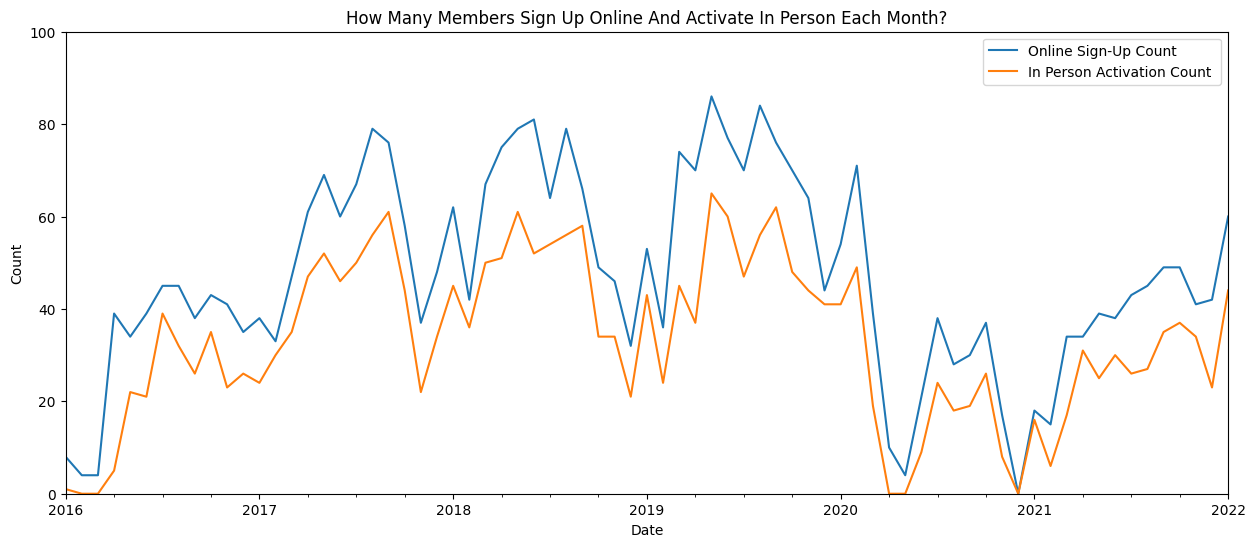

In [24]:
# How many members sign up online, and eventually come in person to active, over time?
import numpy as np
import pandas as pd

members = pd.read_pickle('data/output/members.pkl')

def to_month(timestamp_series):
    return timestamp_series.apply(lambda t: pd.Timestamp(t.year, t.month, 1))

member_dates = pd.DataFrame(
    {
        'Online Sign-Up Count': members['Created'].groupby(to_month(members['Created'])).size().asfreq('MS',fill_value=0),
        'In Person Activation Count ': members['First Membership Started'].groupby(to_month(members['First Membership Started'])).size().asfreq('MS',fill_value=0)
    },
    index=pd.date_range(freq='MS', start=pd.Timestamp('2016-01-01'), end=pd.Timestamp('2022-01-01'))
)

member_dates.plot(
    title='How Many Members Sign Up Online And Activate In Person Each Month?',
    figsize=(15, 6),
    xlabel='Date',
    ylabel='Count',
    ylim=(0,100),
)

<Axes: title={'center': 'Do Members Checkout Items After The First Year?\n\nMembership Years'}, xlabel='Years Of Membership', ylabel='Checkouts Per Year'>

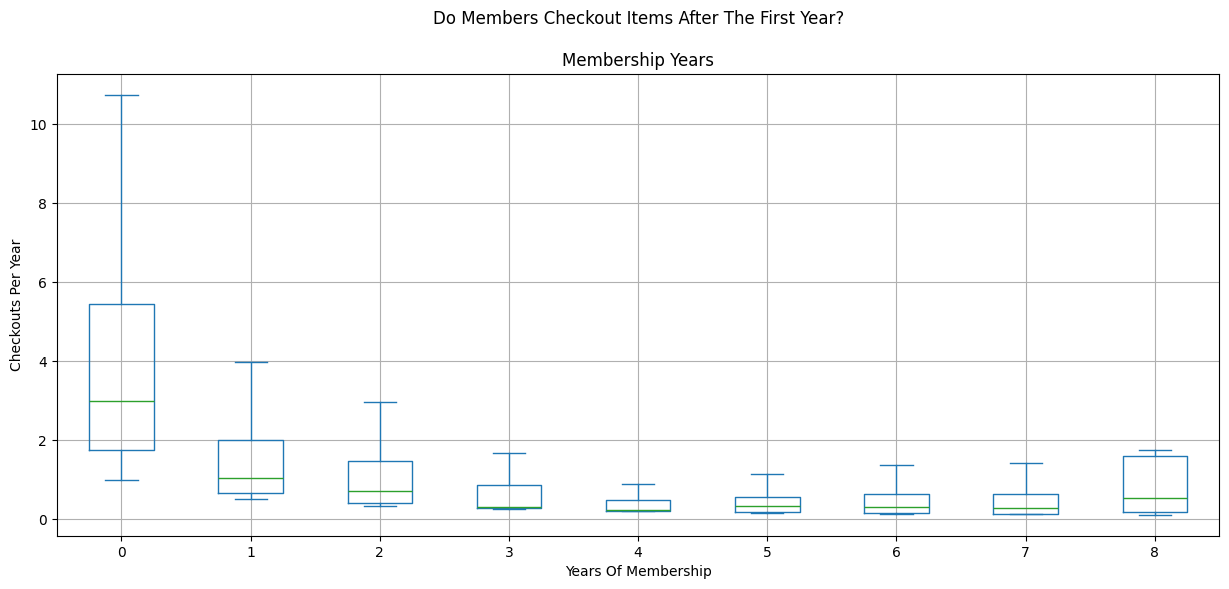

In [25]:
# Do members continue to make checkouts after the first year?
#
# For each membership length in years, determine how many checkouts they make, on average,
# per year.  Ideally this number would trend down slightly over time, indicating sustained
# usage. Right now it drops sharply after the first year.

import pandas as pd
from datetime import date

members = pd.read_pickle('data/output/members.pkl')
active_members = pd.DataFrame(members[members['Current Membership Type'] != 'Request_CheckIDAddressPhoneDOB']).set_index('Membership ID')

def membership_days(member):
    t = pd.Timestamp(date.today())
    # Use days - pd.Timedelta doesn't let us round to Years directly because it is a "non-fixed frequency"
    # (e.g. there are leap years).
    #
    # Round up to nearest day.
    return (t - member['First Membership Started']).round('D').days

active_members['Membership Days'] = active_members.apply(membership_days, axis='columns')
active_members['Membership Years'] = active_members['Membership Days'].apply(lambda days: days // 365)

checkouts = pd.read_pickle('data/output/checkouts.pkl')
checkouts['Year'] = checkouts['Checked Out'].map(lambda c: c.year)
# Exclude 2015 (tool library not fully opened yet) and the current year if it isn't that far in.
checkouts_with_complete_years = checkouts[~checkouts['Year'].isin([2015])]

checkouts_per_member_per_day = checkouts_with_complete_years.groupby('Membership ID')['Membership ID'].size() / active_members['Membership Days']
active_members['Checkouts Per Year'] = 365 * checkouts_per_member_per_day 

active_members.pivot(columns='Membership Years', values='Checkouts Per Year').drop(
    # Remove the one 10 year old member from the plot (this number goes up every year!)
    columns=[10],
).plot.box(
    grid=True,
    figsize=(15, 6),
    # This one has a lot of outliers, and each one is a weird fractional value because of the division above, so hide them away.
    showfliers=False,
    title='Do Members Checkout Items After The First Year?\n\nMembership Years',
    ylabel='Checkouts Per Year',
    xlabel='Years Of Membership',
)

<Axes: title={'center': "How Many Members Haven't Checked Out An Item In X Years"}, xlabel='Years Since Last Checkout', ylabel='Count Of Members'>

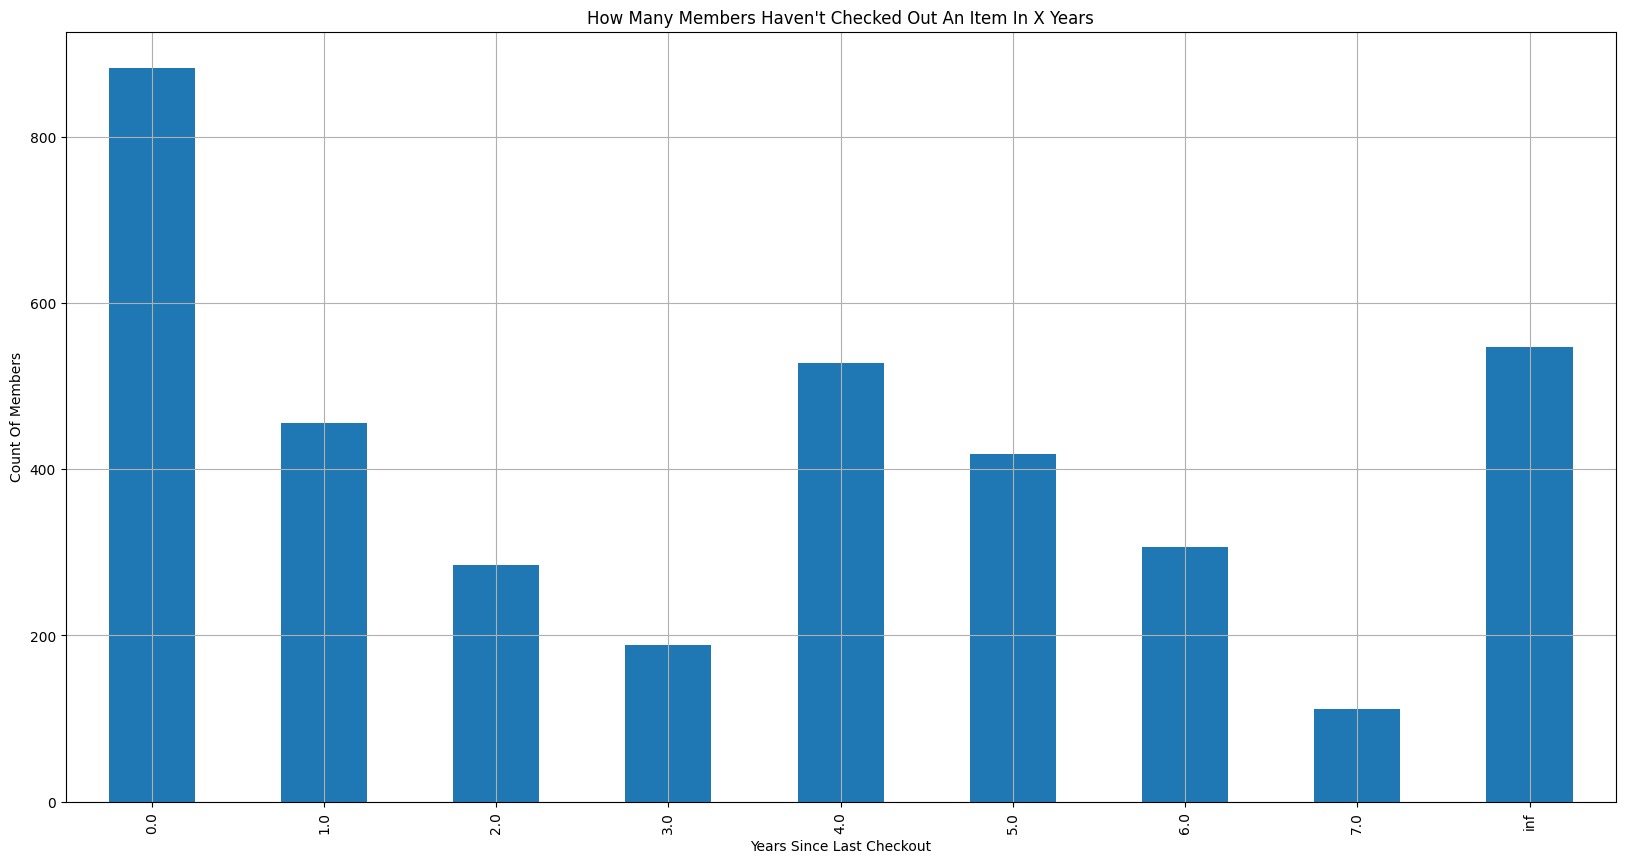

In [33]:
# Group users by length of time since most recent loan
import pandas as pd

members = pd.read_pickle('data/output/members.pkl')
active_members = pd.DataFrame(members[members['Current Membership Type'] != 'Request_CheckIDAddressPhoneDOB'])

checkouts = pd.read_pickle('data/output/checkouts.pkl')
checkouts_with_complete_years = checkouts[checkouts['Checked Out'].between(pd.Timestamp('2016-01-01'), pd.Timestamp('2024-01-01'), inclusive='left')]
by_member = checkouts_with_complete_years.set_index('Membership ID')

most_recent_checkout = active_members.apply(
    lambda m: by_member[by_member.index == m['Membership ID']].max()['Checked Out'],
    axis='columns',
)

t = pd.Timestamp.now()

def years_since_loan(loan):
    # Use days - pd.Timedelta doesn't let us round to Years directly because it is a "non-fixed frequency"
    # (e.g. there are leap years).
    days = (t - loan).round('D')
    
    if pd.isna(days.days):
        # For now, "inf" means "never had a loan"
        return float('inf')

    # Use 365.25 as the average year length, and then take the floor and convert to an int
    return int(days.days // 365.25)

active_members['Years Since Checkout'] = most_recent_checkout.apply(years_since_loan)
member_counts_per_years_since_last_checkout = active_members.groupby(['Years Since Checkout']).size()

# TODO: Maybe this would be more useful as a line by days?
member_counts_per_years_since_last_checkout.plot(
    kind='bar',
    stacked=True,
    figsize=(20, 10),
    grid=True,
    title='How Many Members Haven\'t Checked Out An Item In X Years',
    xlabel='Years Since Last Checkout',
    ylabel='Count Of Members',
)

How Is Our Membership Distributed By Gender?
Sex
female                   9.19%
male                    18.73%
other                    1.26%
unknown                 69.95%
would rather not say     0.86%
dtype: object


<Axes: title={'center': 'Member Gender Breakdown'}>

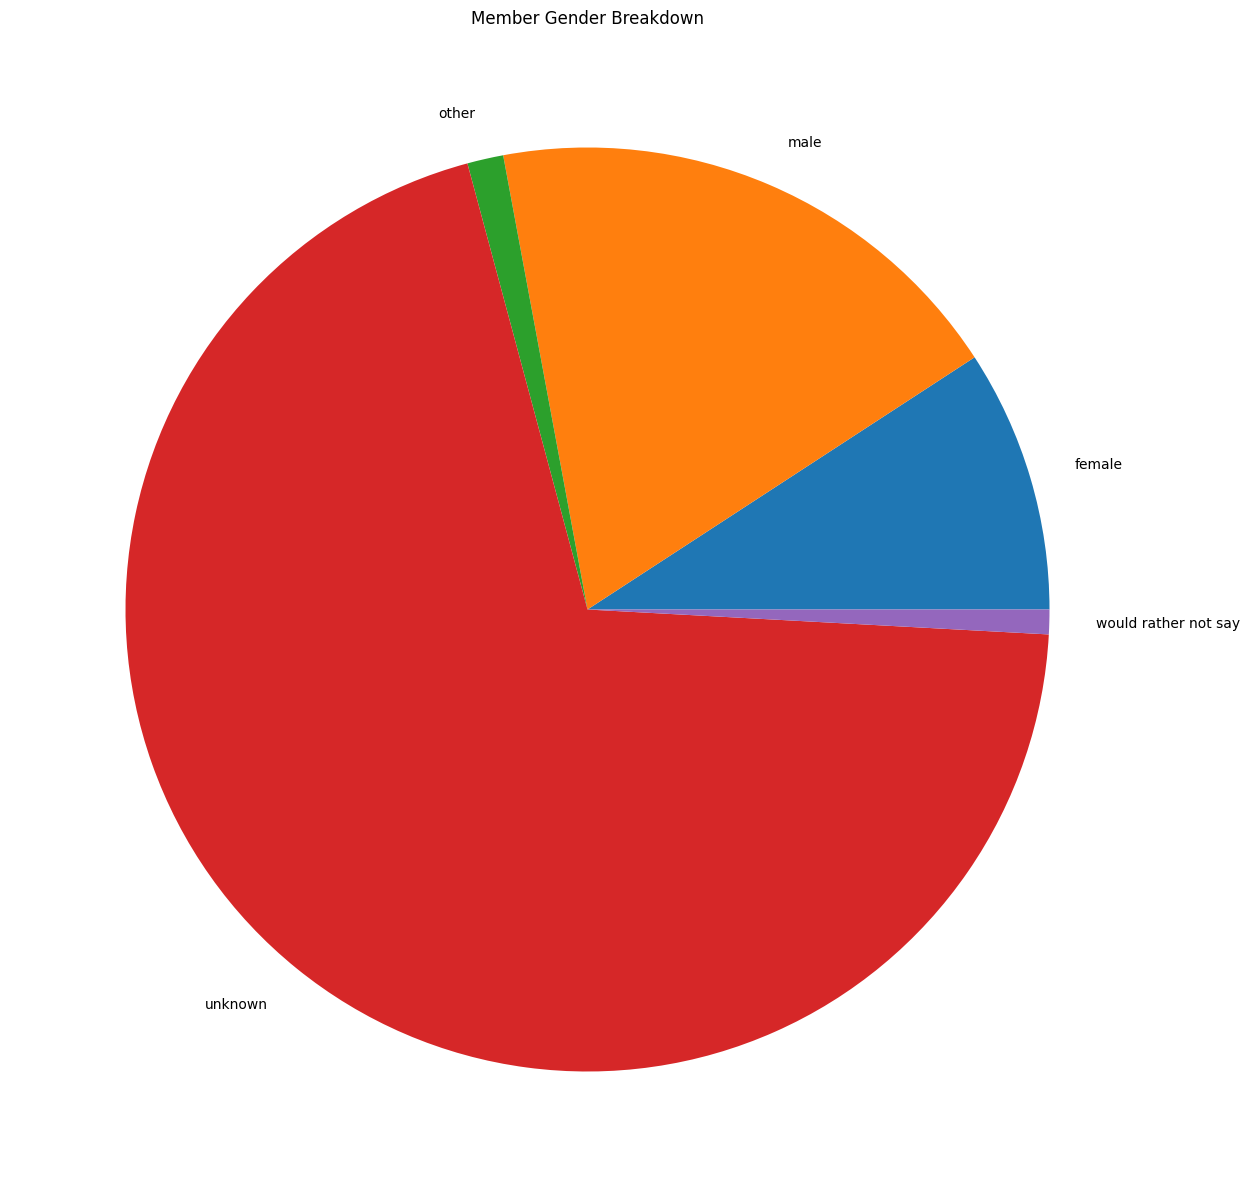

In [27]:
import pandas as pd

members = pd.read_pickle('data/output/members.pkl')
active_members = pd.DataFrame(members[members['Current Membership Type'] != 'Request_CheckIDAddressPhoneDOB'])
active_members['Sex'] = active_members['Sex'].fillna('unknown')

print('How Is Our Membership Distributed By Gender?')
print((100 * active_members.groupby('Sex').size() / active_members.index.size).round(2).map(lambda p: f'{p}%'))
active_members.groupby('Sex').size().plot.pie(ylabel='', title='Member Gender Breakdown', figsize=(15, 15))

How Is Our Membership Distributed By Age?
Age
0-19        0.08%
20-29       2.58%
30-39       2.98%
40-49       0.97%
50-59       0.32%
60-69       0.27%
70+         0.19%
unknown    92.61%
dtype: object


<Axes: title={'center': 'Member Age Group Breakdown'}>

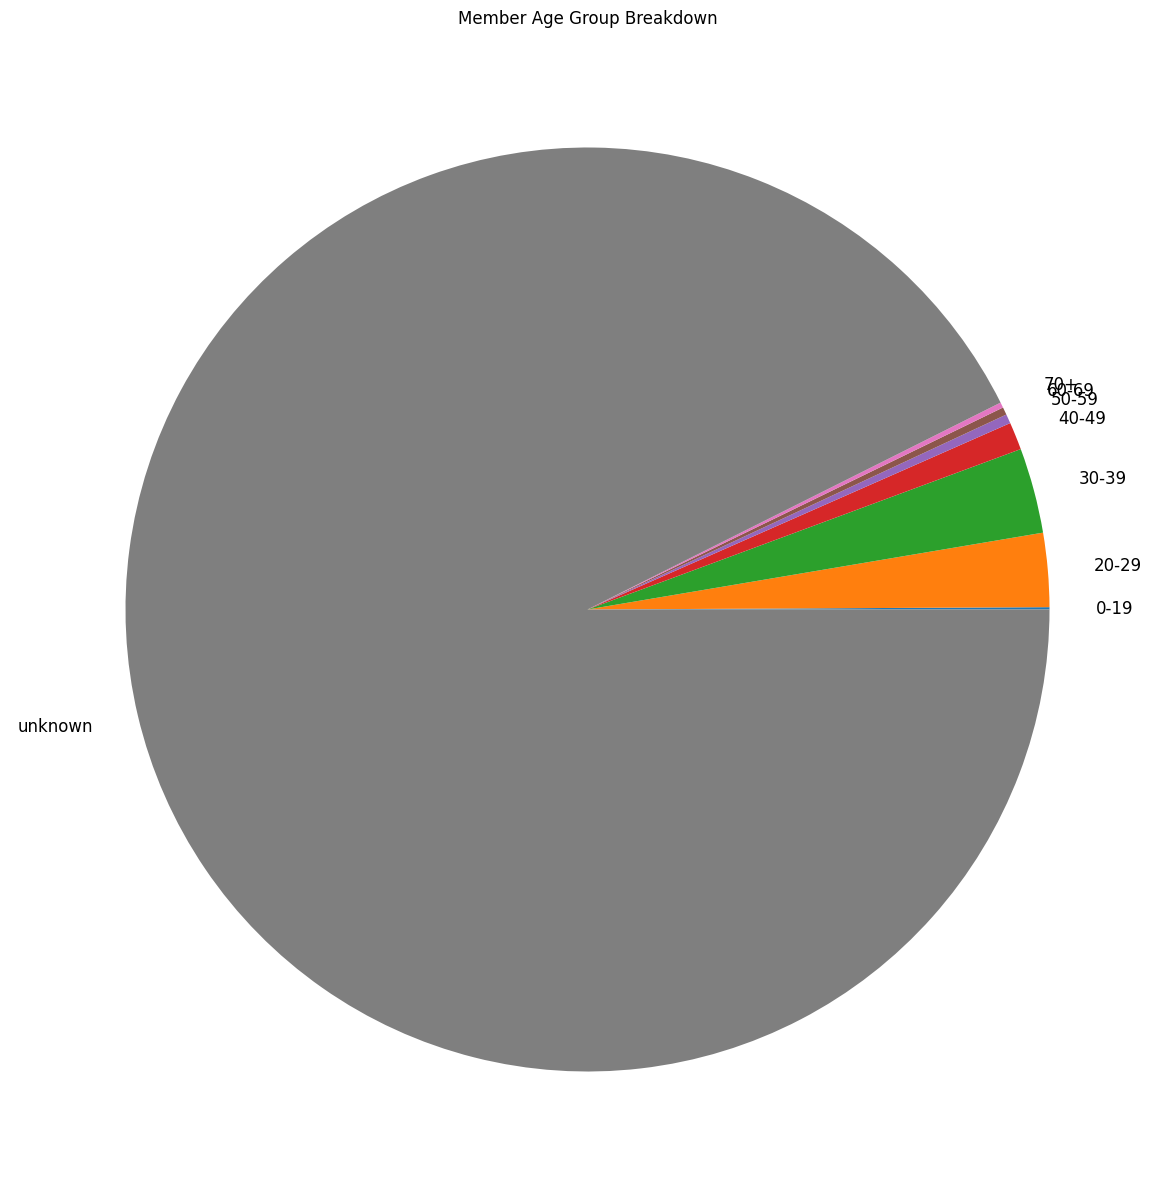

In [28]:
def age_group(age):
    if pd.isna(age):
        return 'unknown'
    
    age_digits = len(str(age))
    # We see a lot of ages that are the year of birth, e.g. 1992
    if age_digits == 4:
        age = int(str(age)[2:])
    elif age_digits != 2:
        return 'unknown'

    if age < 20:
        return '0-19'
    elif age >= 70:
        return '70+'
    else:
        # Rounds down to nearest 10
        clipped_age = (age // 10) * 10
        return f'{clipped_age}-{clipped_age+9}'

regular_members = pd.DataFrame(members[members['Current Membership Type'] != 'Request_CheckIDAddressPhoneDOB'])

by_age_group = regular_members.groupby(regular_members['Age'].apply(age_group)).size()
print('How Is Our Membership Distributed By Age?')
print((100 * by_age_group / regular_members['Age'].size).round(2).apply(lambda p: f'{p}%'))
by_age_group.plot.pie(
    ylabel='', title='Member Age Group Breakdown',
    fontsize='large',
    figsize=(15, 15)
)

Race                                 Checked
American Indian or Alaskan Native    Y           0.19%
Asian                                Y           1.50%
Black or African American            Y           0.43%
Hispanic                             Y           0.73%
Native Hawaiian or Pacific Islander  Y           0.05%
Other                                Y           1.16%
White                                Y          10.29%
dtype: object


<Axes: title={'center': 'How Is Our Membership Distributed By Race?'}>

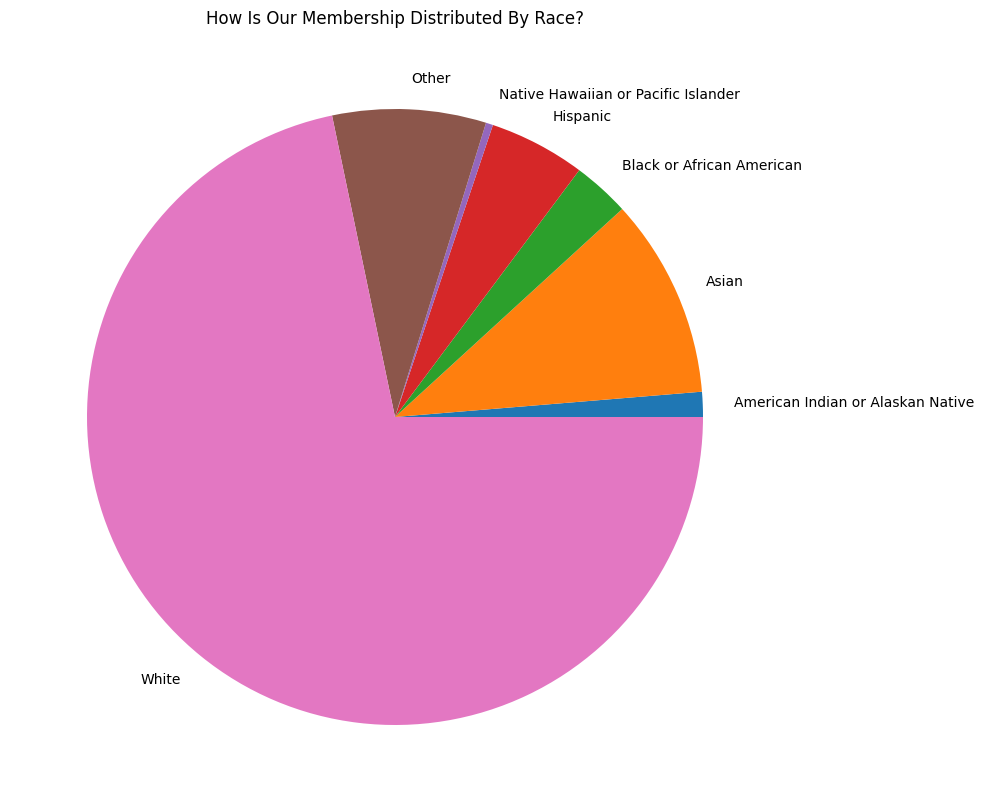

In [29]:
import pandas as pd

members = pd.read_pickle('data/output/members.pkl')
active_members = pd.DataFrame(members[members['Current Membership Type'] != 'Request_CheckIDAddressPhoneDOB'])

race_cols = active_members[
    active_members['American Indian or Alaskan Native'].notna() |
    active_members['Asian'].notna()|
    active_members['Black or African American'].notna() |
    active_members['Hispanic'].notna() |
    active_members['White'].notna() |
    active_members['Native Hawaiian or Pacific Islander'].notna()|
    active_members['Other'].notna()
]


# Percentage filled
race_filled_in_count = race_cols['Membership ID'].size
race_filled_in_proportion = race_filled_in_count / active_members['Membership ID'].size
# active_members['Unknown'] = (
#     active_members['American Indian or Alaskan Native'].isna() &
#     active_members['Asian'].isna() &
#     active_members['Black or African American'].isna() &
#     active_members['Hispanic'].isna() &
#     active_members['White'].isna() &
#     active_members['Native Hawaiian or Pacific Islander'].isna() &
#     active_members['Other'].isna()
# ).replace(True, 'Y').replace(False, pd.NA)

race_col_stats = active_members[[
    'American Indian or Alaskan Native',
    'Asian',
    'Black or African American',
    'Hispanic',
    'White',
    'Native Hawaiian or Pacific Islander',
    'Other',
    # 'Unknown'
]].unstack().reset_index(level=0).rename(columns={'level_0': 'Race', 0: 'Checked'}).groupby(by=['Race', 'Checked']).size()


print((100 * race_col_stats / active_members['Membership ID'].size).map(lambda p: f'{p:.2f}%'))

race_col_stats.unstack()['Y'].plot.pie(figsize=(10, 10), title='How Is Our Membership Distributed By Race?', ylabel='')

In [30]:
# What proportion of loans were created by admins?

import pandas as pd

loans = pd.read_pickle('data/output/loans.pkl')
admins = pd.read_csv('data/input/admin-users-snapshot.csv', usecols=('Member ID', ), dtype={'Member ID': 'object'}).rename(columns={'Member ID': 'Membership ID'})

loans['Is Admin'] = loans['Membership ID'].isin(admins['Membership ID'])
loans['Year'] = loans['Checked Out'].apply(lambda d: d.year)

print('What Percent Of Loans Are Made By Admins?')
percent = loans[loans['Is Admin']].size / loans.size * 100
print(f'{percent:.0f}%')

What Percent Of Loans Are Made By Admins?
7%


Discounts By Transaction Type
                      Discount  Payment Amount
Item Type                                     
Check Out              1286.80        11333.83
Check Out (Renewal)    9654.31         1712.50
Donation                  0.00         2784.25
Late Fee              11062.85         8449.26
Loan Fee                  0.60            1.40
Loan Return             161.60          518.04
Membership Change       816.60          209.60
Membership Extension      0.00            0.00
Membership Fee          114.44        34690.10
Other                    58.40         2897.61


<Axes: title={'center': 'Membership Fees'}, xlabel='Date'>

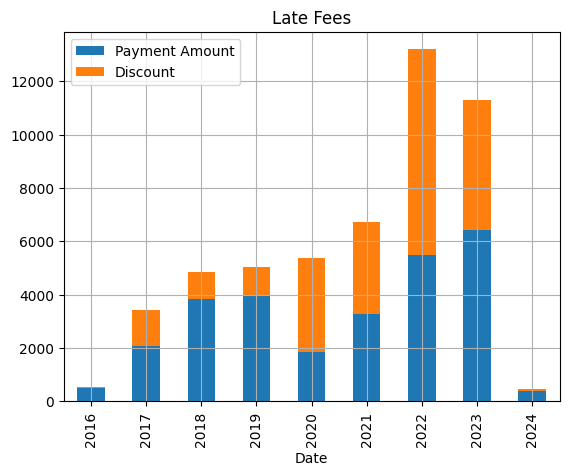

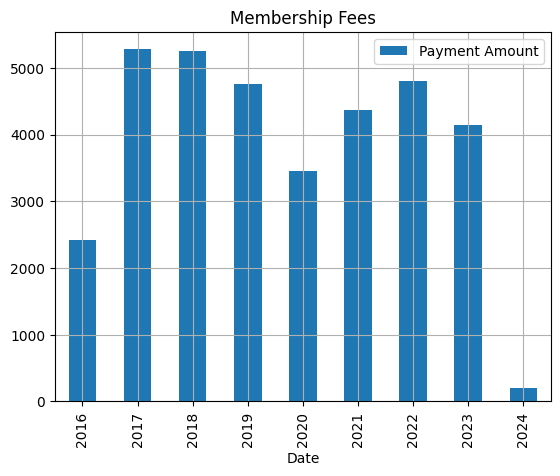

In [31]:
# How much money do we make from late fees per item? Per year? What proportion of late fees are discounted?
import pandas as pd

transactions = pd.read_pickle('data/output/transactions.pkl')

payments = transactions[transactions['Payment method'].notna()]

print('Discounts By Transaction Type')
# Still sussing out the logic of the transaction data.  'Payment Amount' seems to be consistently filled
# whereas 'Amount Paid', and other columns aren't, so using that as the "actual amount".
print(payments.groupby('Item Type')[['Discount', 'Payment Amount']].sum())
late_fees = payments[payments['Item Type'] != 'Membership Fee']
membership_fees = payments[payments['Item Type'] == 'Membership Fee']
late_fees.groupby(payments['Date'].apply(lambda d: d.year))[[ 'Payment Amount', 'Discount']].sum().plot.bar(stacked=True, title='Late Fees', grid=True)
membership_fees.groupby(payments['Date'].apply(lambda d: d.year))[['Payment Amount']].sum().plot.bar(stacked=True, title='Membership Fees', grid=True)

In [32]:
# What item types do we actually have inventory for?
#
# This is handy for generating a default Replacement Cost for each Item Type, per the Cost Metrics Report
# methodology here: https://drive.google.com/file/d/0B_TrKFtCsrCKbC0wRUxQX1hJQlk/view?usp=sharing&resourcekey=0-o31JocNgLSGl7PT2WRLkHw

import pandas as pd

items = pd.read_pickle('data/output/inventory.pkl')
item_types = pd.read_csv('data/input/item-types.csv')

item_types_with_inventory = items['Item Type'].unique()

pd.DataFrame({ 'Item Type': item_types[item_types['Type'].isin(item_types_with_inventory)]['Type'] }).to_csv('data/output/item-types-in-inventory.csv')